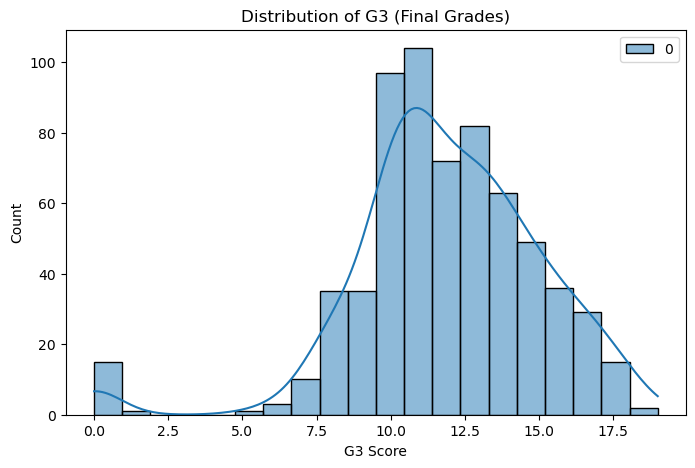

✅ [Linear Regression] 훈련 데이터 R²: 83.6%
✅ [Linear Regression] 테스트 데이터 R²: 83.5%
✅ [XGBoost] 훈련 데이터 R²: 96.4%
✅ [XGBoost] 테스트 데이터 R²: 76.6%
✅ 모델 학습 및 저장 완료!


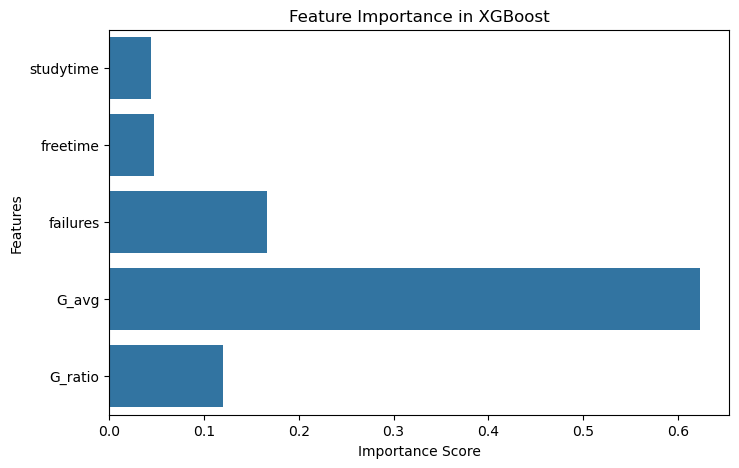

In [ ]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ 데이터 불러오기
df = pd.read_csv("data/student-por.csv")

# ✅ `higher` 컬럼 제거 후 필요한 특성 선택
X = df[['studytime', 'freetime', 'failures', 'G1', 'G2']]
y = df[['G3']].values  # 성적(G3), .values로 NumPy 배열 변환

# ✅ 성적 데이터(G3)의 분포 확인
plt.figure(figsize=(8, 5))
sns.histplot(y, bins=20, kde=True)
plt.title("Distribution of G3 (Final Grades)")
plt.xlabel("G3 Score")
plt.ylabel("Count")
plt.show()

# ✅ 로그 변환 제거 (그대로 사용)
y_transformed = y  # 🔹 변환하지 않음!

# ✅ `StandardScaler()` 사용하여 스케일링 (MinMaxScaler 대신)
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# ✅ 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.2, random_state=42)

# ✅ 입력 데이터(X) 정규화
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# ✅ 출력 데이터(y) 정규화 (Standard Scaling 적용)
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# ✅ Linear Regression 학습
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train_scaled)

# ✅ XGBoost 학습 (로그 변환 X)
regressor2 = XGBRegressor(
    n_estimators=300,  # 트리 개수 증가
    learning_rate=0.05,  # 학습률 낮춤
    max_depth=6,  # 깊이 조정
    subsample=0.8,  # 샘플링 비율
    colsample_bytree=0.8,
    random_state=42
)
regressor2.fit(X_train_scaled, y_train_scaled.ravel())  # 🔹 y를 벡터로 변환

# ✅ 모델 및 변환기 저장
joblib.dump(regressor, "regressor.pkl")
joblib.dump(regressor2, "regressor2.pkl")
joblib.dump(scaler_X, "scaler_X.pkl")
joblib.dump(scaler_y, "scaler_y.pkl")  # 🔹 `scaler_y`도 저장

# ✅ 모델 평가
y_pred_train_lr = regressor.predict(X_train_scaled)
y_pred_test_lr = regressor.predict(X_test_scaled)

y_pred_train_xgb = regressor2.predict(X_train_scaled)
y_pred_test_xgb = regressor2.predict(X_test_scaled)

# ✅ 역변환 적용하여 원래 값으로 변환
y_pred_train_lr = scaler_y.inverse_transform(y_pred_train_lr.reshape(-1, 1))
y_pred_test_lr = scaler_y.inverse_transform(y_pred_test_lr.reshape(-1, 1))

y_pred_train_xgb = scaler_y.inverse_transform(y_pred_train_xgb.reshape(-1, 1))
y_pred_test_xgb = scaler_y.inverse_transform(y_pred_test_xgb.reshape(-1, 1))

# ✅ R² 평가
train_score_lr = r2_score(y_train, y_pred_train_lr) * 100
test_score_lr = r2_score(y_test, y_pred_test_lr) * 100

train_score_xgb = r2_score(y_train, y_pred_train_xgb) * 100
test_score_xgb = r2_score(y_test, y_pred_test_xgb) * 100

print(f"✅ [Linear Regression] 훈련 데이터 R²: {train_score_lr:.1f}%")
print(f"✅ [Linear Regression] 테스트 데이터 R²: {test_score_lr:.1f}%")
print(f"✅ [XGBoost] 훈련 데이터 R²: {train_score_xgb:.1f}%")
print(f"✅ [XGBoost] 테스트 데이터 R²: {test_score_xgb:.1f}%")
print("✅ 모델 학습 및 저장 완료!")


In [ ]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

# ✅ 데이터 불러오기
df = pd.read_csv("data/student-por.csv")

# ✅ `higher` 컬럼 제거 후 필요한 특성 선택
X = df[['studytime', 'freetime', 'failures', 'G1', 'G2']]
y = df[['G3']]  # 성적(G3)

# ✅ MinMaxScaler 적용
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# ✅ 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ 입력 데이터(X) 정규화
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# ✅ 출력 데이터(y) 정규화
y_train_scaled = scaler_y.fit_transform(y_train)  # 🔹 반드시 y도 정규화해야 함
y_test_scaled = scaler_y.transform(y_test)

# ✅ Linear Regression 학습
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train_scaled)

# ✅ XGBoost 학습
regressor2 = XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42
)
regressor2.fit(X_train_scaled, y_train_scaled.ravel())  # 🔹 y를 벡터로 변환

# ✅ 모델 및 변환기 저장
joblib.dump(regressor, "regressor.pkl")
joblib.dump(regressor2, "regressor2.pkl")
joblib.dump(scaler_X, "scaler_X.pkl")
joblib.dump(scaler_y, "scaler_y.pkl")  # 🔹 `scaler_y`도 저장

# ✅ 모델 평가
y_pred_train_lr = regressor.predict(X_train_scaled)
y_pred_test_lr = regressor.predict(X_test_scaled)
train_score_lr = r2_score(y_train_scaled, y_pred_train_lr) * 100
test_score_lr = r2_score(y_test_scaled, y_pred_test_lr) * 100

y_pred_train_xgb = regressor2.predict(X_train_scaled)
y_pred_test_xgb = regressor2.predict(X_test_scaled)
train_score_xgb = r2_score(y_train_scaled, y_pred_train_xgb) * 100
test_score_xgb = r2_score(y_test_scaled, y_pred_test_xgb) * 100

print(f"✅ [Linear Regression] 훈련 데이터 R²: {train_score_lr:.1f}%")
print(f"✅ [Linear Regression] 테스트 데이터 R²: {test_score_lr:.1f}%")
print(f"✅ [XGBoost] 훈련 데이터 R²: {train_score_xgb:.1f}%")
print(f"✅ [XGBoost] 테스트 데이터 R²: {test_score_xgb:.1f}%")
print("✅ 모델 학습 및 저장 완료!")


✅ [Linear Regression] 훈련 데이터 R²: 84.5%
✅ [Linear Regression] 테스트 데이터 R²: 86.2%
✅ [XGBoost] 훈련 데이터 R²: 95.7%
✅ [XGBoost] 테스트 데이터 R²: 77.2%
✅ 모델 학습 및 저장 완료!


In [455]:
import numpy as np
import pandas as pd
import joblib

# ✅ 저장된 모델 & 스케일러 로드
scaler_X = joblib.load("scaler_X.pkl")
scaler_y = joblib.load("scaler_y.pkl")



# ✅ 테스트할 새로운 데이터 입력
new_data = pd.DataFrame([[5, 3, 1, 80, 90]],  # 예시: 공부 시간 5시간, 자유시간 3, 실패 과목 1, 과거 성적 80/90
                        columns=['studytime', 'freetime', 'failures', 'G1', 'G2'])

# ✅ MinMaxScaler 적용
new_data_scaled = scaler_X.transform(new_data)

# ✅ Linear Regression 예측
predicted_lr = regressor_lr.predict(new_data_scaled)
predicted_lr = np.clip(predicted_lr, 0, 100)  # 0~100 사이로 클리핑

# ✅ XGBoost 예측
predicted_xgb = regressor_xgb.predict(new_data_scaled)
predicted_xgb = np.clip(predicted_xgb, 0, 100)  # 0~100 사이로 클리핑

# ✅ 예측값을 float로 변환하여 출력 (배열이 아닌 값으로 변환)
print(f"📢 [Linear Regression] 예측된 성적 (G3): {predicted_lr.item():.2f}점")
print(f"📢 [XGBoost Regression] 예측된 성적 (G3): {predicted_xgb.item():.2f}점")


📢 [Linear Regression] 예측된 성적 (G3): 92.65점
📢 [XGBoost Regression] 예측된 성적 (G3): 0.96점


In [448]:
regressor_lr = joblib.load("regressor.pkl")   # Linear Regression 모델
regressor_xgb = joblib.load("regressor2.pkl") # XGBoost 모